In [321]:
import pandas as pd

In [322]:
# now we can use the normalized weights to calculate the liveability score for each suburb

suburbs = pd.read_csv('../data/curated/procesed_data.csv')

In [323]:
# lower case all columns
suburbs.columns = map(str.lower, suburbs.columns)

# replace spaces with underscores in column names
suburbs.columns = suburbs.columns.str.replace(' ', '_')


In [324]:
suburbs.columns

Index(['distance_to_cbd', 'time_to_cbd', 'distance_to_station',
       'time_to_station', 'cemeteries', 'civic_squares_and_promenades',
       'conservation_reserves', 'government_schools',
       'natural_and_semi-natural_open_space', 'non-government_schools',
       'parks_and_gardens', 'public_housing_reserves', 'recreation_corridor',
       'services_and_utilities_reserves',
       'sportsfields_and_organised_recreation', 'tertiary_institutions',
       'transport_reservations', 'year', 'average_household_size',
       'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
       'total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'sal_code', 'median_score',
       'average_price', 'proximity_to_beach', 'interest_rate',
       'median_tot_fam_inc_weekly/inflation',
       'median_tot_hhd_inc_weekly/inflation',
       'median_tot

In [325]:
import pandas as pd

# List of variables
variables = [
    'distance_to_cbd', 'time_to_cbd', 'distance_to_station', 'time_to_station',
    'cemeteries', 'civic_squares_and_promenades', 'conservation_reserves',
    'government_schools', 'natural_and_semi-natural_open_space', 'non-government_schools',
    'parks_and_gardens', 'public_housing_reserves', 'recreation_corridor',
    'services_and_utilities_reserves', 'sportsfields_and_organised_recreation',
    'tertiary_institutions', 'transport_reservations', 'year', 'average_household_size',
    'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p', 'total_dwelings',
    'average_quarterly_count', 'commercial', 'education', 'food_establishments',
    'healthcare', 'industrial', 'public_transport', 'recreation', 'residential',
    'shopping', 'sal_code', 'median_score', 'average_price', 'proximity_to_beach',
    'interest_rate', 'median_tot_fam_inc_weekly/inflation',
    'median_tot_hhd_inc_weekly/inflation', 'median_tot_prsnl_inc_weekly/inflation',
    'average_weekly_rent/inflation/household_size', 'a_crimes_against_the_person/per_person',
    'b_property_and_deception_offences/per_person', 'c_drug_offences/per_person',
    'd_public_order_and_security_offences/per_person', 'e_justice_procedures_offences/per_person',
    'f_other_offences/per_person'
]

# Hypothetical liveability coefficients
coefficients = [
    0,  # distance_to_cbd
    -1,  # time_to_cbd
    0,  # distance_to_station
    -0.5,  # time_to_station
    -0.2,  # cemeteries
    0.1,   # civic_squares_and_promenades
    0.1,   # conservation_reserves
    0.2,   # government_schools
    0.2,   # natural_and_semi-natural_open_space
    0.2,   # non-government_schools
    0.3,   # parks_and_gardens
    -0.8,  # public_housing_reserves
    0.2,   # recreation_corridor
    0.3,   # services_and_utilities_reserves
    0.4,   # sportsfields_and_organised_recreation
    0.3,   # tertiary_institutions
    -0.2,   # transport_reservations
    0.0,   # year
    0.1,   # average_household_size
    -0.1,  # average_num_psns_per_bedroom
    0.0,   # median_age_persons
    0.0,   # tot_p_p
    0.0,   # total_dwelings
    0.0,   # average_quarterly_count
    0.1,   # commercial
    0.2,   # education
    0.3,   # food_establishments
    0.4,   # healthcare
    -0.8,  # industrial
    0.1,   # public_transport
    0.3,   # recreation
    0.2,   # residential
    0.3,   # shopping
    0.0,   # sal_code
    1.3,   # median_score
    0.3,   # average_price
    -0.8,   # proximity_to_beach
    0,     # interest_rate
    0.7,   # median_tot_fam_inc_weekly/inflation
    0.7,   # median_tot_hhd_inc_weekly/inflation
    0.7,   # median_tot_prsnl_inc_weekly/inflation
    -0.2,  # average_weekly_rent/inflation/household_size
    -1.2,  # a_crimes_against_the_person/per_person
    -1,  # b_property_and_deception_offences/per_person
    -2.5,  # c_drug_offences/per_person
    -1.5,  # d_public_order_and_security_offences/per_person
    -1.3,  # e_justice_procedures_offences/per_person
    -0.9   # f_other_offences/per_person
]

df_weights = pd.DataFrame({
    'Variable': variables,
    'Liveability_Coefficient': coefficients
})

# Create DataFrame
df_liveability = pd.DataFrame({
    'Variable': variables,
    'Liveability_Coefficient': coefficients
})

# Display the DataFrame
print(df_liveability)


                                           Variable  Liveability_Coefficient
0                                   distance_to_cbd                      0.0
1                                       time_to_cbd                     -1.0
2                               distance_to_station                      0.0
3                                   time_to_station                     -0.5
4                                        cemeteries                     -0.2
5                      civic_squares_and_promenades                      0.1
6                             conservation_reserves                      0.1
7                                government_schools                      0.2
8               natural_and_semi-natural_open_space                      0.2
9                            non-government_schools                      0.2
10                                parks_and_gardens                      0.3
11                          public_housing_reserves                     -0.8

In [326]:
from sklearn.preprocessing import StandardScaler

# standardise the data
# Exclude 'sal_code' from standardization
columns_to_standardize = [col for col in suburbs.columns if col != 'sal_code']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
suburbs[columns_to_standardize] = scaler.fit_transform(suburbs[columns_to_standardize])

In [327]:
# weight the features
suburbs['liveability_score'] = 0

for i in range(len(variables)):
    suburbs['liveability_score'] += suburbs[variables[i]] * coefficients[i]

# group suburb by sal_code and calculate the mean liveability score
suburbs = suburbs.groupby('sal_code').mean()

suburbs.reset_index(inplace=True)
    

In [328]:
# merge with shapefile find name

import geopandas as gpd
SAL = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

In [329]:
# Filter out non-numeric values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: x.isnumeric())]

# Ensure 'SAL_CODE21' is of type int in SAL GeoDataFrame
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)

# Merge top_ten with SAL GeoDataFrame on 'sal_code' and 'SAL_CODE21'
suburbs = SAL.merge(suburbs, left_on='SAL_CODE21', right_on='sal_code')


# Get top ten suburbs by liveability score
top_ten = suburbs.nlargest(20, 'liveability_score')
print(top_ten[['sal_code', 'liveability_score']])

     sal_code  liveability_score
163     21152          14.733039
337     22547          14.194872
48      20337          13.742478
215     21587          13.658766
190     21336          13.205162
11      20066          13.070771
149     21010          12.970014
65      20468          12.955390
176     21246          12.655365
73      20523          12.351460
150     21013          12.090264
122     20864          12.082558
22      20124          11.696367
13      20077          11.207263
244     21816          11.003367
63      20453          10.836662
265     22016          10.722389
214     21586          10.626482
49      20338          10.302118
21      20123          10.243763


In [330]:
# merge against code

In [331]:
top_ten['liveability_score']

163    14.733039
337    14.194872
48     13.742478
215    13.658766
190    13.205162
11     13.070771
149    12.970014
65     12.955390
176    12.655365
73     12.351460
150    12.090264
122    12.082558
22     11.696367
13     11.207263
244    11.003367
63     10.836662
265    10.722389
214    10.626482
49     10.302118
21     10.243763
Name: liveability_score, dtype: float64

In [332]:
top_ten['SAL_NAME21']

163      Hawthorn (Vic.)
337               Toorak
48       Brighton (Vic.)
215         Malvern East
190           Kew (Vic.)
11       Armadale (Vic.)
149     Glen Iris (Vic.)
65     Canterbury (Vic.)
176       Ivanhoe (Vic.)
73       Caulfield North
150        Glen Waverley
122          Elsternwick
22          Balwyn North
13             Ashburton
244       Mount Waverley
63     Camberwell (Vic.)
265               Ormond
214       Malvern (Vic.)
49         Brighton East
21                Balwyn
Name: SAL_NAME21, dtype: object

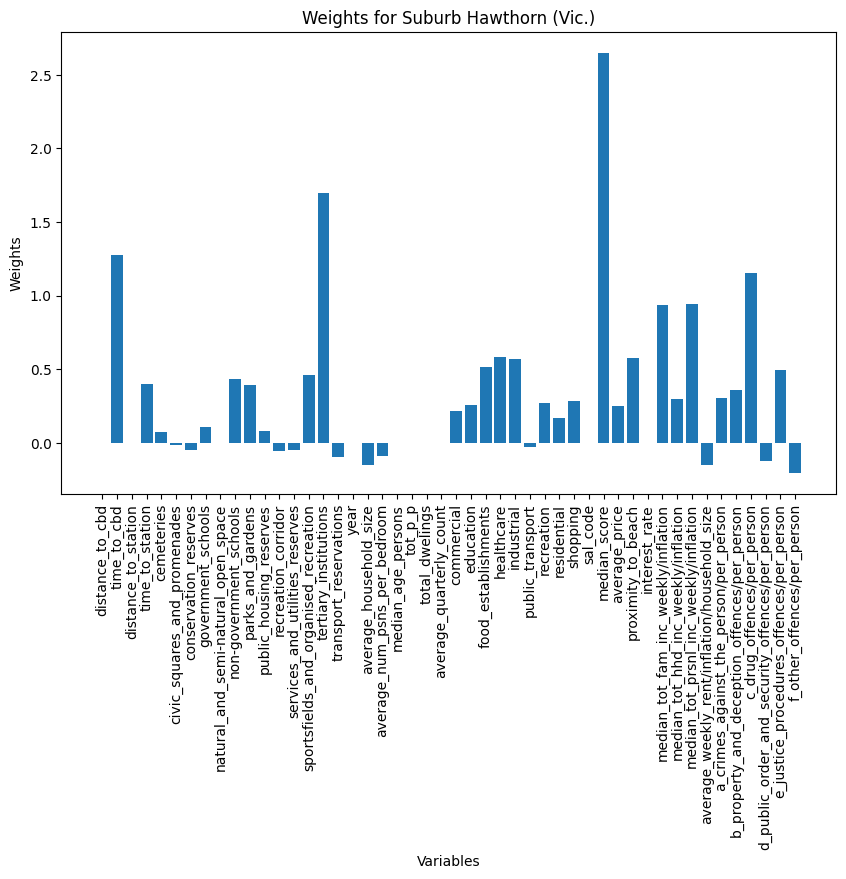

[-0.0, 1.2766958419464145, -0.0, 0.3985403822712914, 0.07007791741265265, -0.017986911616590173, -0.05052973920179646, 0.10755022611070626, -0.00011334461006281703, 0.4355314921625838, 0.3925406809844995, 0.08143800406164761, -0.056160910217331134, -0.04889838364377083, 0.46168334489317364, 1.696994600831956, -0.09389210365795952, 0.0, -0.14894965852863948, -0.09322692655488425, -0.0, 0.0, 0.0, 0.0, 0.21456512906956032, 0.25739095197006967, 0.5129956125980243, 0.5848434178012328, 0.5673936539614378, -0.027368374934057006, 0.2668390449089577, 0.1709053489812305, 0.2849437372239114, 0.0, 2.647778388785024, 0.25175172239559723, 0.5789878300360384, -0.0, 0.9371361068605827, 0.29875546881559517, 0.9393145057325424, -0.15099756500641892, 0.30681473115700986, 0.35734239595254014, 1.1563368570410812, -0.12541720046227275, 0.4965835672720716, -0.20515063795697788]


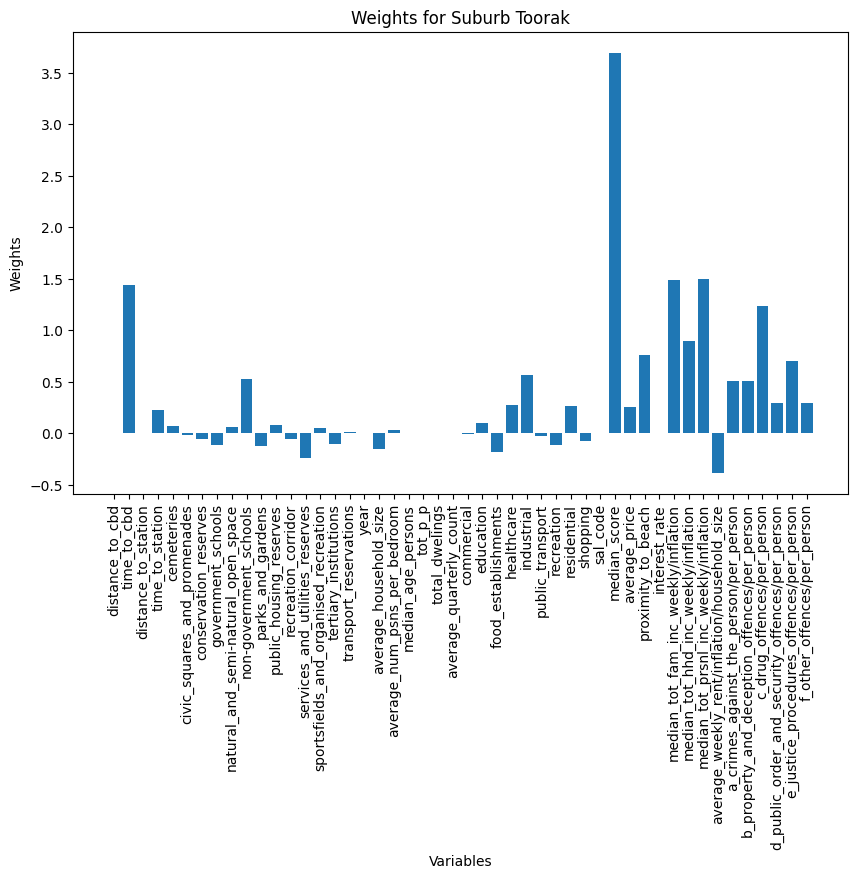

[-0.0, 1.4420038788919944, -0.0, 0.22926508313842914, 0.07007791741265265, -0.017986911616590173, -0.05052973920179646, -0.11500347796601203, 0.05787448136819942, 0.525013734099033, -0.12348525252533611, 0.08143800406164761, -0.056160910217331134, -0.2419807741660627, 0.04755163491504846, -0.10208599463823737, 0.016930018202756855, 0.0, -0.14894965852863948, 0.034566279396096154, 0.0, 0.0, 0.0, -0.0, -0.0028599649553459196, 0.09867644664890052, -0.17971395858036268, 0.2734922291777301, 0.5673936539614378, -0.027368374934057006, -0.11584877211218766, 0.2669096757152543, -0.07731667884328665, 0.0, 3.691809161110776, 0.25720592323852254, 0.7575580382209202, -0.0, 1.4890615260068527, 0.9001079600334934, 1.4934963245576185, -0.38410322569820626, 0.5098612837232271, 0.5053190326809398, 1.234420210679053, 0.2906762270933787, 0.703626460885469, 0.2939308750060435]


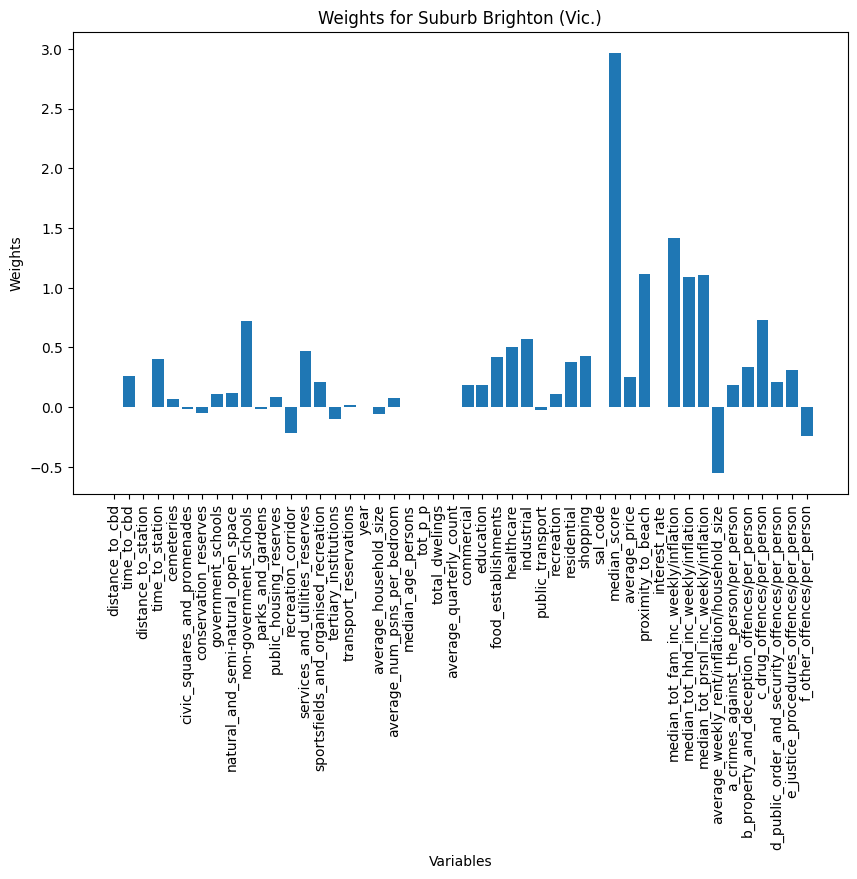

[-0.0, 0.26113053453287627, -0.0, 0.4046301405068472, 0.07007791741265265, -0.017986911616590173, -0.05052973920179646, 0.10755022611070626, 0.11586230734646173, 0.7177720928363523, -0.017580678726366122, 0.08143800406164761, -0.21961178238987125, 0.4725089725962553, 0.20878389168206613, -0.10208599463823737, 0.016930018202756855, 0.0, -0.059045492565577284, 0.07349207314200387, 0.0, 0.0, 0.0, -0.0, 0.18734482485733792, 0.18296324917811918, 0.4185929142958296, 0.5018726599557091, 0.5673936539614378, -0.027368374934057006, 0.11292469322896302, 0.3757290144710232, 0.43231474668347203, 0.0, 2.9660699578279335, 0.2539581600911889, 1.112455330624237, -0.0, 1.4200861093639934, 1.0905687892188642, 1.1096588899996114, -0.5506910885069466, 0.1823812336911547, 0.3391123722918268, 0.7266263559667401, 0.20924936716096076, 0.3074891628974727, -0.23958919065026568]


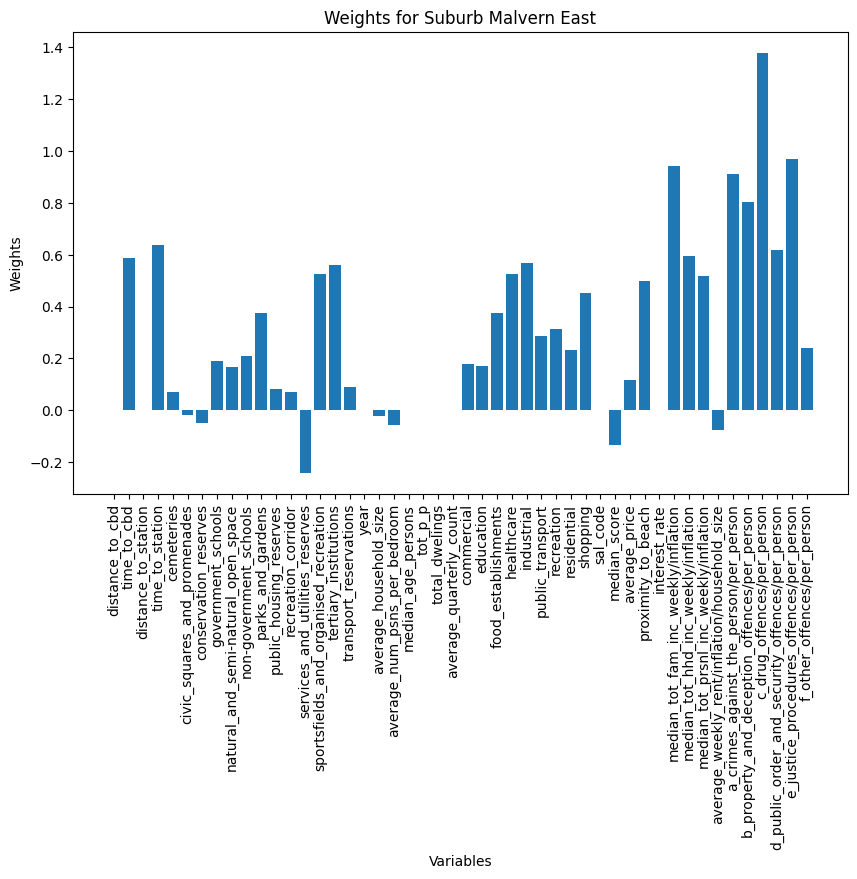

[-0.0, 0.587183877528588, -0.0, 0.638347963718572, 0.07007791741265265, -0.017986911616590173, -0.05052973920179646, 0.18927444308042835, 0.16845267858036145, 0.21061791268548677, 0.37607908311589244, 0.08143800406164761, 0.06989955324072306, -0.2419807741660627, 0.5263086190444968, 0.5622791303711252, 0.08872943611981035, 0.0, -0.0227500401939242, -0.056297169108238156, -0.0, 0.0, 0.0, -0.0, 0.17940115039067125, 0.16927490181484534, 0.3769680646948163, 0.5253195966415959, 0.5673936539614378, 0.2851345712941387, 0.314867978933582, 0.2310265230517505, 0.4524800662093214, 0.0, -0.13496184137318643, 0.1149815683313805, 0.4969632740847396, -0.0, 0.9432973896652744, 0.5964204782516399, 0.5164744438354532, -0.07601613035032515, 0.9109399249819949, 0.802416545975701, 1.3785012022932515, 0.6188345176041938, 0.9693726663196299, 0.24053192152863098]


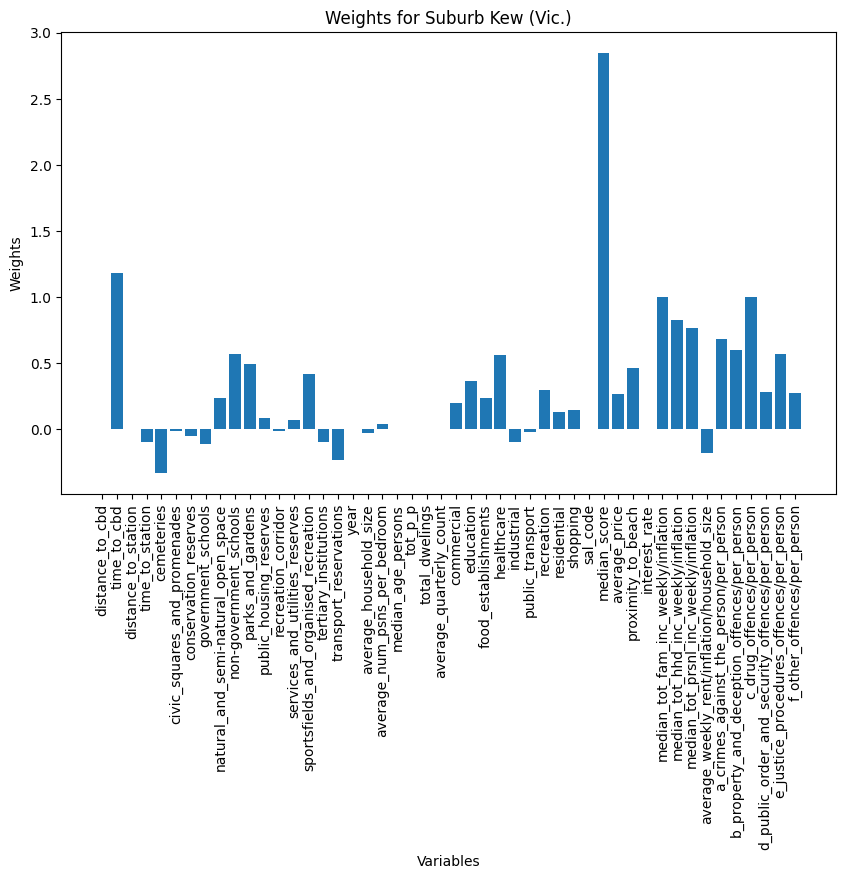

[-0.0, 1.1826624395444156, 0.0, -0.10171169087606036, -0.33399901905833596, -0.017986911616590173, -0.05052973920179646, -0.11500347796601203, 0.23006134545019657, 0.5667658979474085, 0.49472907990606074, 0.08143800406164761, -0.013359745388150216, 0.06404757436136792, 0.4119125123382209, -0.10208599463823737, -0.23491186472689904, 0.0, -0.03081813170976775, 0.034566279396096154, 0.0, 0.0, 0.0, -0.0, 0.19370978243148068, 0.3637100879635459, 0.2338159534735973, 0.5556456462100066, -0.09848267408785588, -0.027368374934057006, 0.2933656384676398, 0.12435713051489423, 0.13912645838224363, 0.0, 2.8457997669756936, 0.26273774780407283, 0.4640785431215033, -0.0, 0.9947953880411232, 0.823968894317617, 0.7621054296918692, -0.18153602991171627, 0.6839618535306199, 0.5946550705805809, 0.9985942891828583, 0.27873267249504496, 0.5634202738513993, 0.2701921387616426]


In [336]:
# get weights for the top top_ten
# for every suburb in the top ten, get the weights for each feature
# and graph

import matplotlib.pyplot as plt

# Get the weights for the top ten suburbs
for index, row in list(top_ten.iterrows())[:5]:
    sal_code = row['SAL_NAME21']

    # Get the weights for the suburb
    weights = []

    for i in range(len(variables)):
        weight = row[variables[i]] * coefficients[i]
        weights.append(weight)
    
    # Plot the weights
    plt.figure(figsize=(10, 6))
    plt.bar(variables, weights)
    plt.xlabel('Variables')
    plt.ylabel('Weights')
    plt.title(f'Weights for Suburb {sal_code}')
    plt.xticks(rotation=90)
    plt.show()
    
    print(weights)



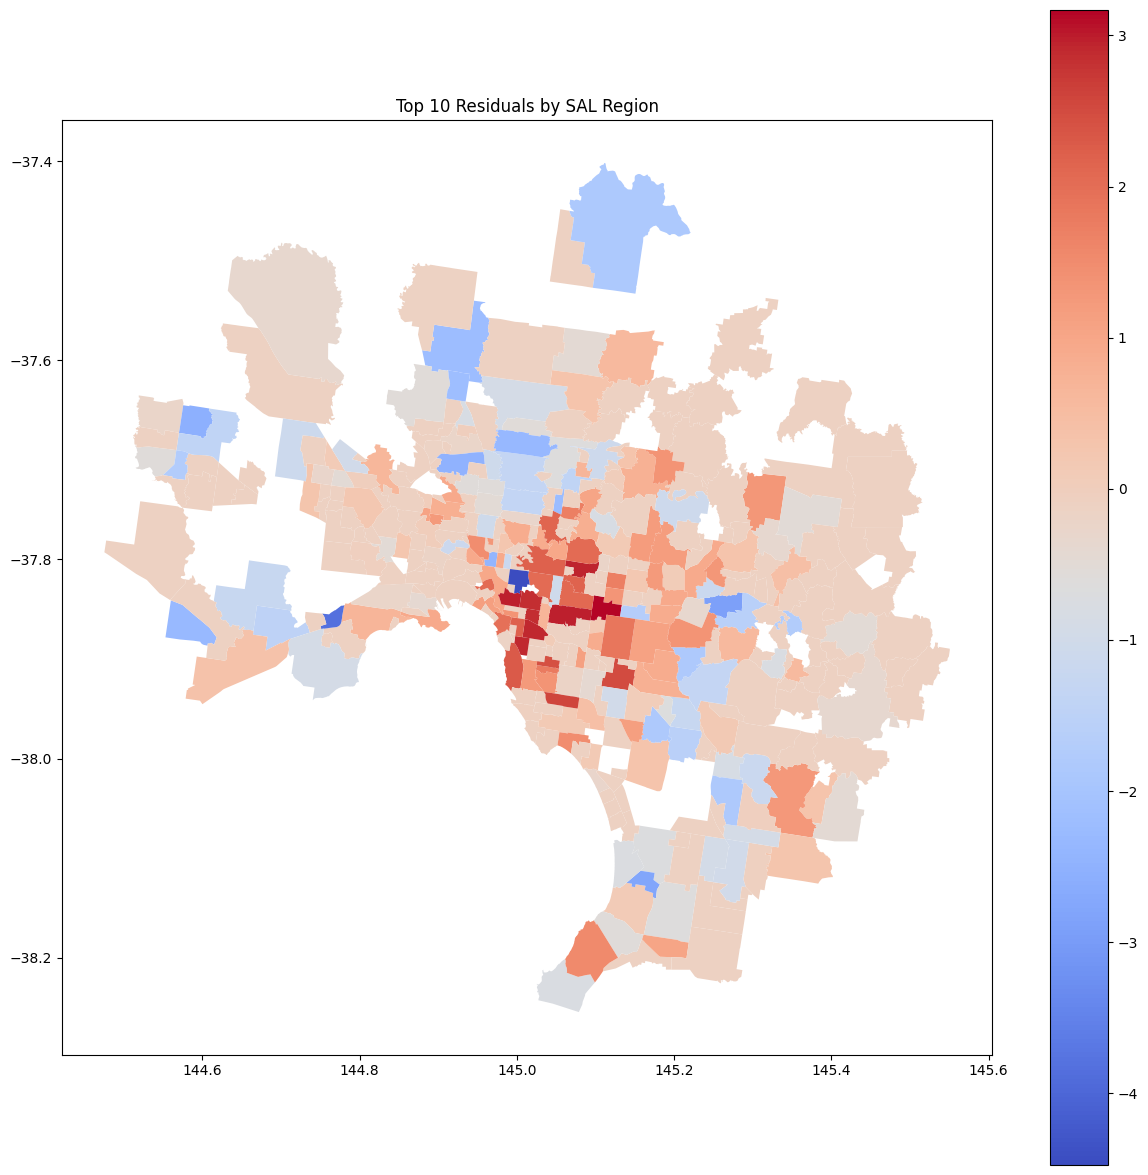

In [337]:


# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
suburbs.plot(column='median_score', ax=ax, legend=True, cmap='coolwarm')
plt.title('Top 10 Residuals by SAL Region')
plt.show()

In [318]:
top_ten[top_ten['SAL_NAME21'] == 'Croydon (Vic.)']

,sal_code,distance_to_cbd,time_to_cbd,distance_to_station,time_to_station,cemeteries,civic_squares_and_promenades,conservation_reserves,government_schools,natural_and_semi-natural_open_space,...,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
